### ENIT 2024-2025
# Prédiction du prix des diamants: Regression
### Élève ingénieur : Lekehal Hammada
### Classe : 3AGI1+NePRev

# 1. Importing the libraries

In [2]:
##Toutes les bibliothèques utilisées dans ce projet
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# 2. Loading Data

In [3]:
data = pd.read_csv("C:\\Users\\Youba\\Downloads\\diamonds.csv\\diamonds.csv")
data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [4]:
data.shape

(53940, 11)

Le jeu de données se compose de 11 colonnes et de 53940 lignes.

# 3. Data Preprocessing

 **Étapes impliquées dans le prétraitement des données :**
* Nettoyage des données
* Identification et suppression des valeurs aberrantes
* Encodage des variables catégorielles


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


La première colonne est un index ("Unnamed: 0"), nous allons donc la supprimer.

In [6]:
new_data = data.drop(["Unnamed: 0"], axis=1)

In [7]:
new_data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

Les valeurs minimales de "x", "y" et "z" sont égales à zéro, ce qui indique qu'il existe des valeurs erronées dans les données, représentant des diamants sans dimension ou à deux dimensions. Nous devons donc filtrer ces points, car il s'agit clairement de données incorrectes.

In [8]:
#supression des diamants sans dimension ou à deux dimensions
new_data = new_data.drop(new_data[new_data["x"]==0].index)
new_data = new_data.drop(new_data[new_data["y"]==0].index)
new_data = new_data.drop(new_data[new_data["z"]==0].index)
new_data.shape

(53920, 10)

Nous avons perdu 20 points de données en supprimant les diamants sans dimensions (2D ou 1D).

**Pairplot des données**

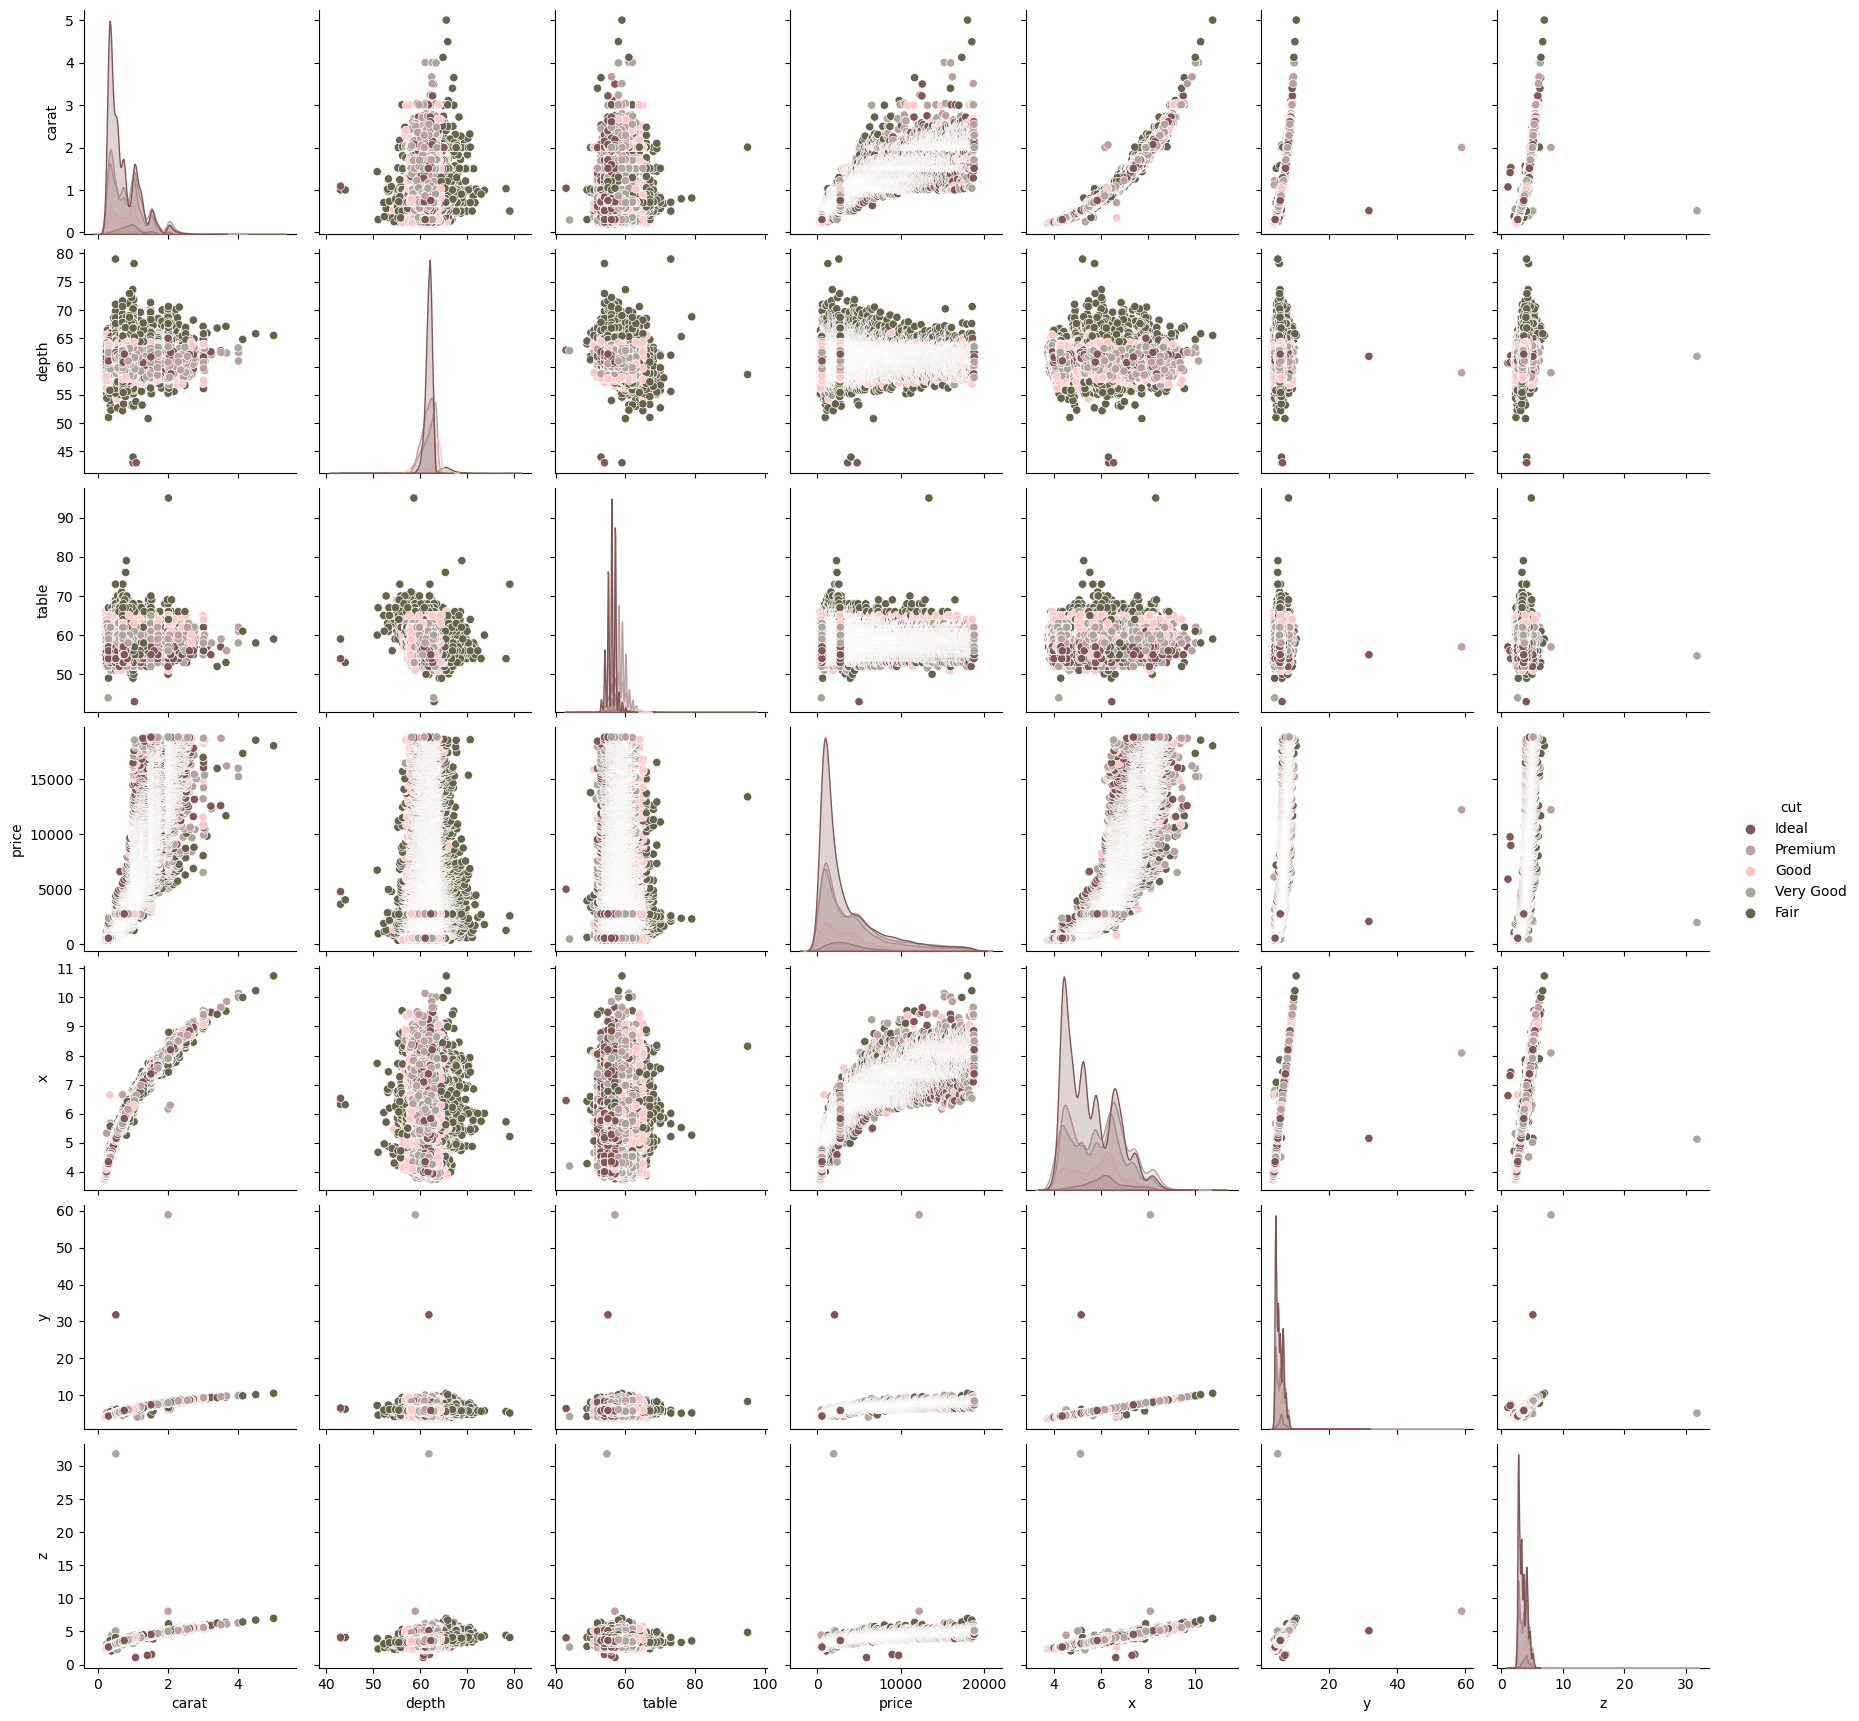

In [9]:
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"] # mon propre palette
ax = sns.pairplot(new_data, hue= "cut",palette=shade)  


Certaines caractéristiques présentent des points de données qui s'éloignent considérablement du reste du dataset, ce qui pourrait affecter les performances de notre modèle de régression.

- **"y" et "z"** contiennent des valeurs aberrantes liées aux dimensions qui doivent être éliminées.  
- La **"depth"** devrait être limitée, mais il est nécessaire d'examiner la courbe de régression pour en être sûr.  
- La caractéristique **"table"** doit également être limitée.  
- Examinons les graphiques de régression pour analyser de plus près ces valeurs aberrantes.  

Text(0.5, 1.0, "Ligne de régression sur Price vs 'y'")

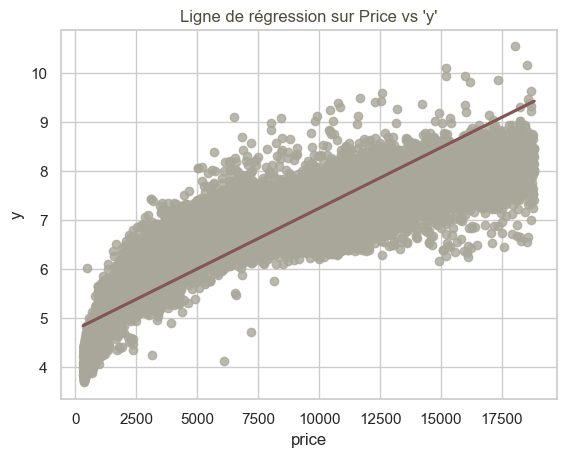

In [113]:
ax = sns.regplot(x="price", y="y", data=new_data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Ligne de régression sur Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Ligne de régression sur Price vs 'z'")

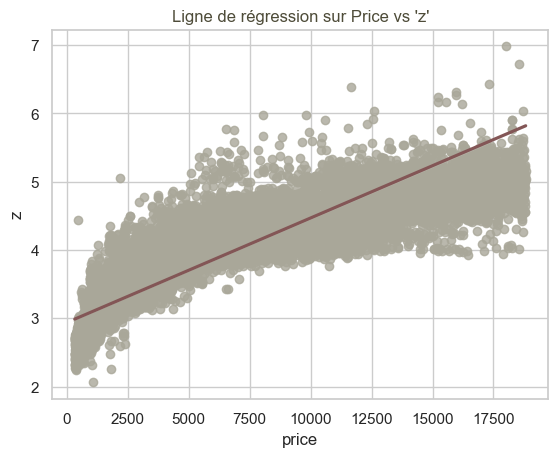

In [114]:
ax= sns.regplot(x="price", y="z", data=new_data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Ligne de régression sur Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

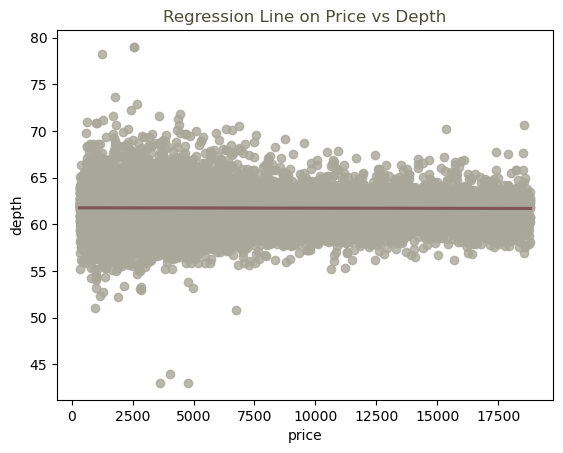

In [12]:
ax= sns.regplot(x="price", y="depth", data=new_data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Ligne de régression sur Price vs Depth", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

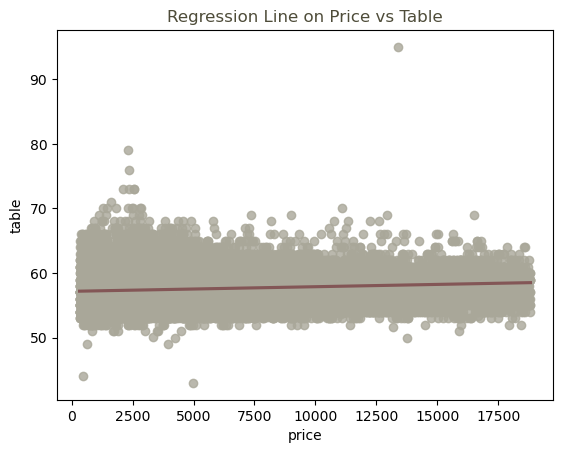

In [13]:
ax=sns.regplot(x="price", y="table", data=new_data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Ligne de régression sur Price vs Table", color="#4e4c39")

In [14]:
scaler=StandardScaler()

In [15]:
bd=scaler.fit_transform(new_data[['carat','depth','table','price','x','y','z']])

<Axes: >

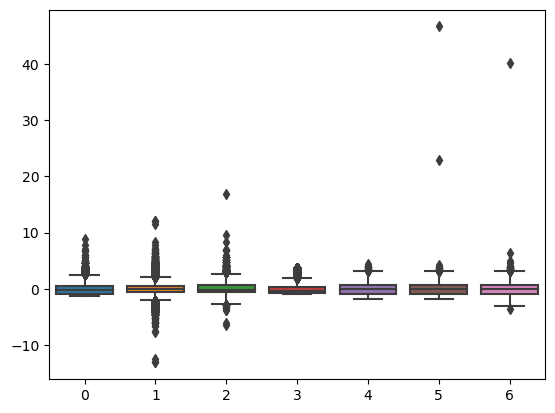

In [16]:
#boxplot 
sns.boxplot(data = bd,orient='v')

Nous pouvons clairement repérer des valeurs aberrantes dans ces attributs. Ensuite, nous allons supprimer ces points de données.

In [17]:
# Supression des valeurs aberrants. 
new_data = new_data[(new_data["depth"]<75)&(new_data["depth"]>45)]
new_data = new_data[(new_data["table"]<80)&(new_data["table"]>40)]
new_data = new_data[(new_data["x"]<30)]
new_data = new_data[(new_data["y"]<30)]
new_data = new_data[(new_data["z"]<30)&(new_data["z"]>2)]
new_data.shape

(53907, 10)

Maintenant que nous avons éliminé les valeurs aberrantes liées à la régression, examinons le pair plot des données restantes.

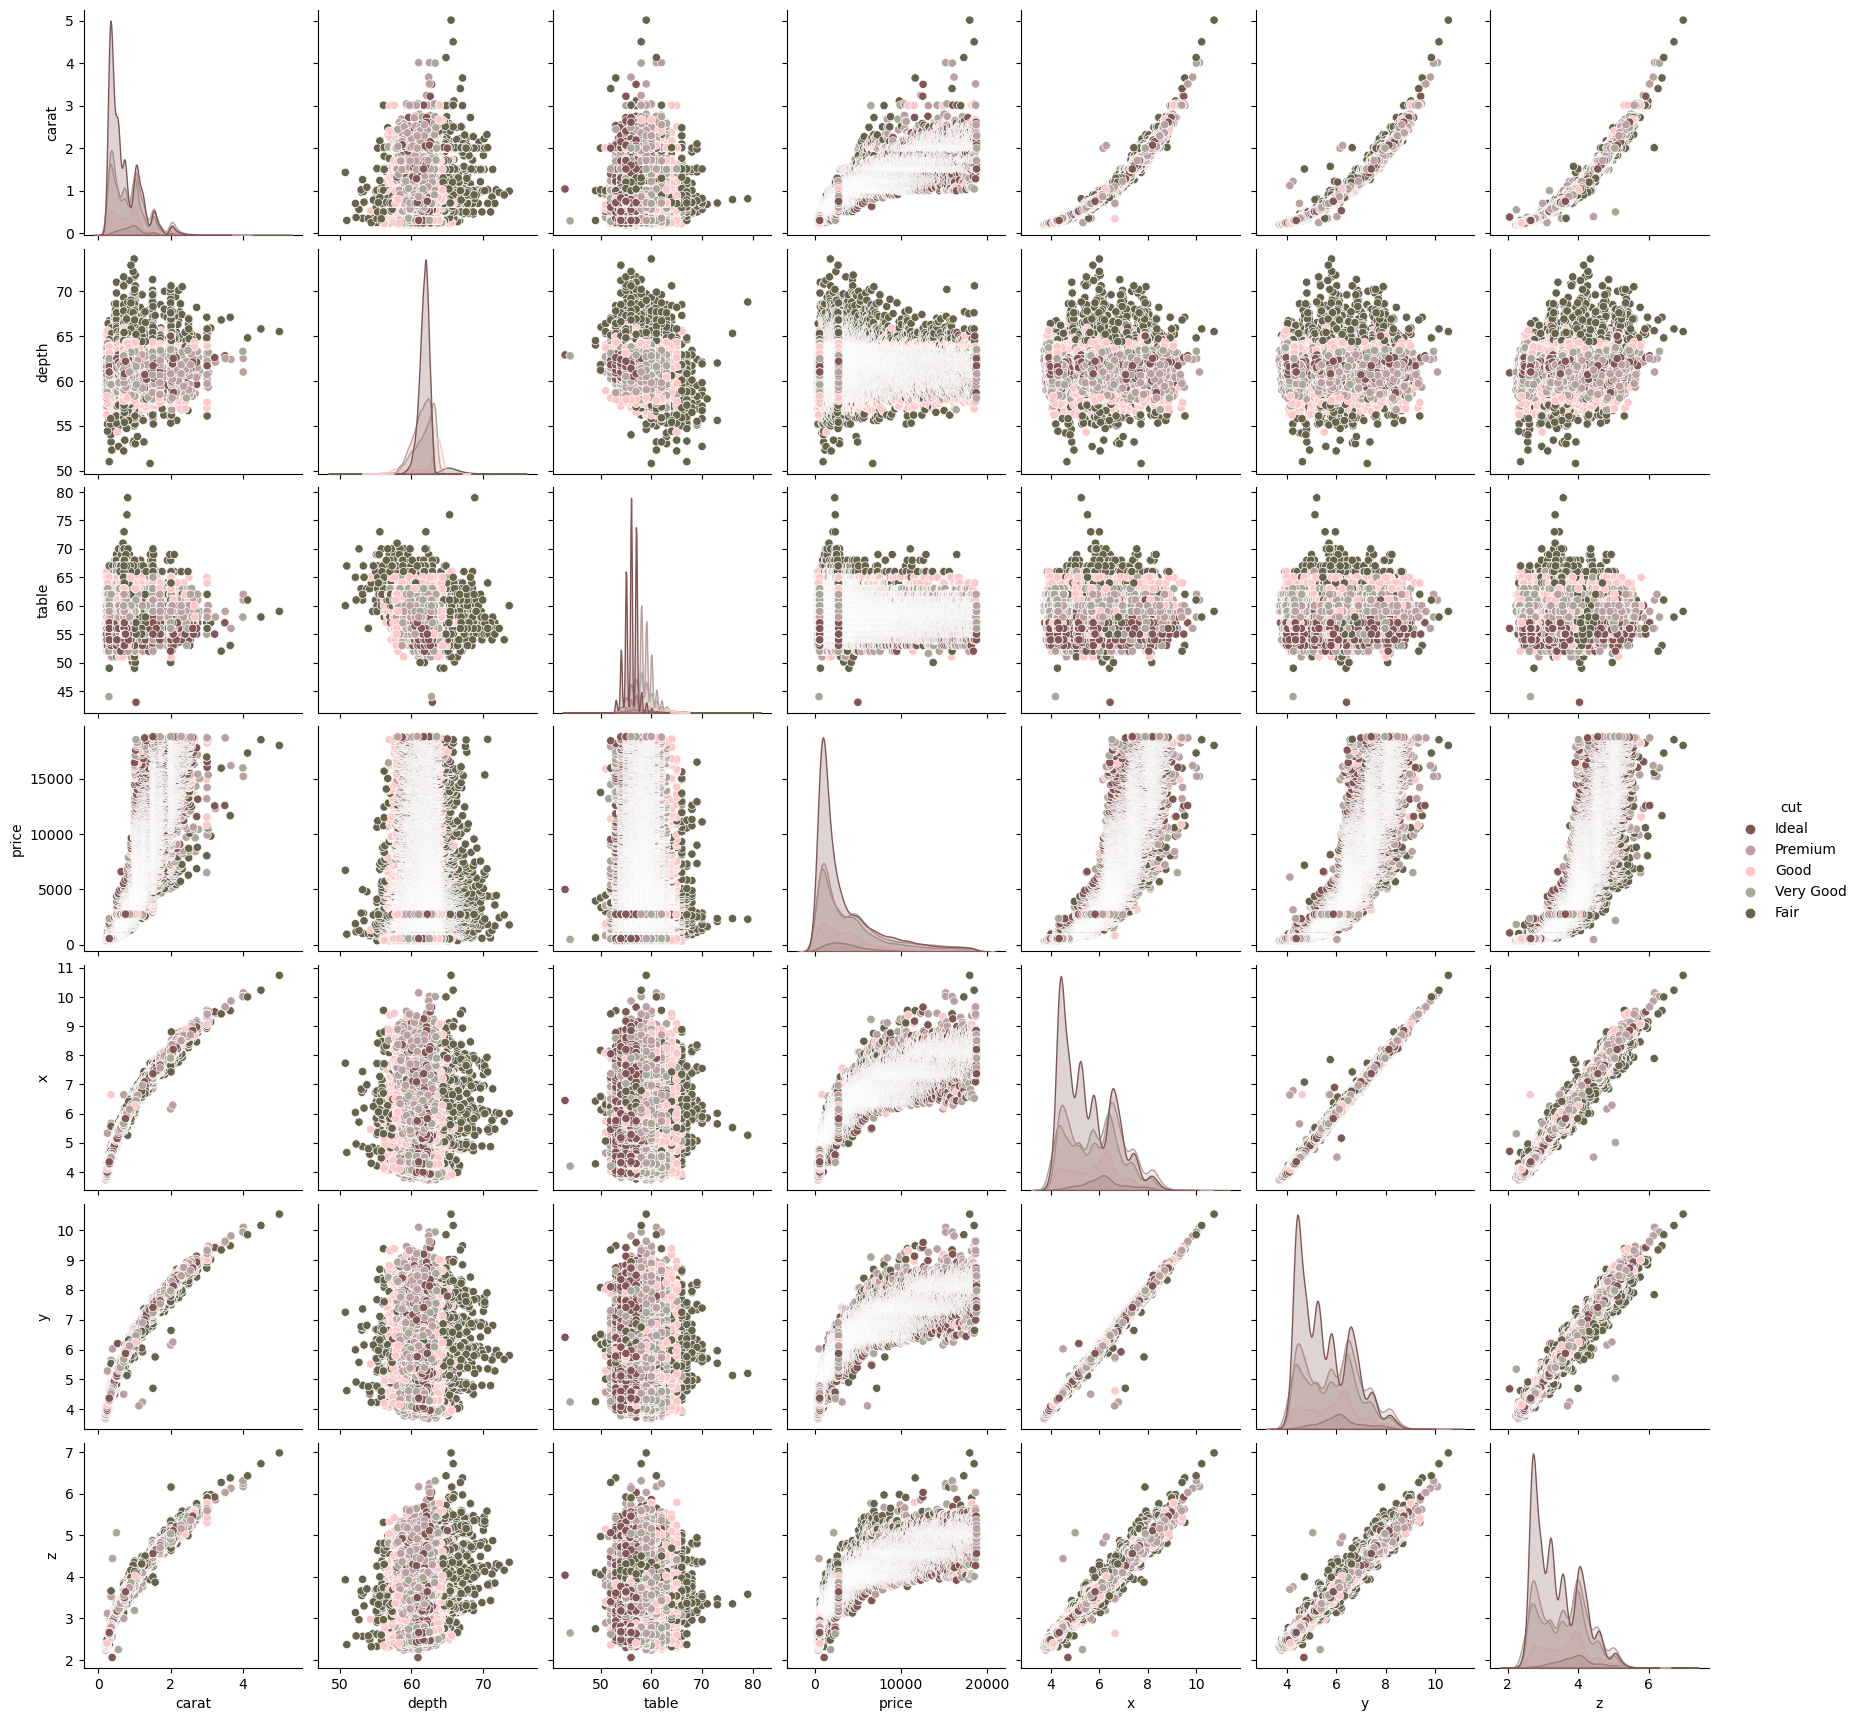

In [18]:
ax=sns.pairplot(new_data, hue= "cut",palette=shade)

C'est un ensemble de données beaucoup plus propre. 
Ensuite, nous allons traiter les variables catégorielles. 

In [19]:
# Listes des variables categorielles
s = (new_data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


Nous avons trois variables catégorielles. Examinons-les.

Text(0.5, 0, 'Cut')

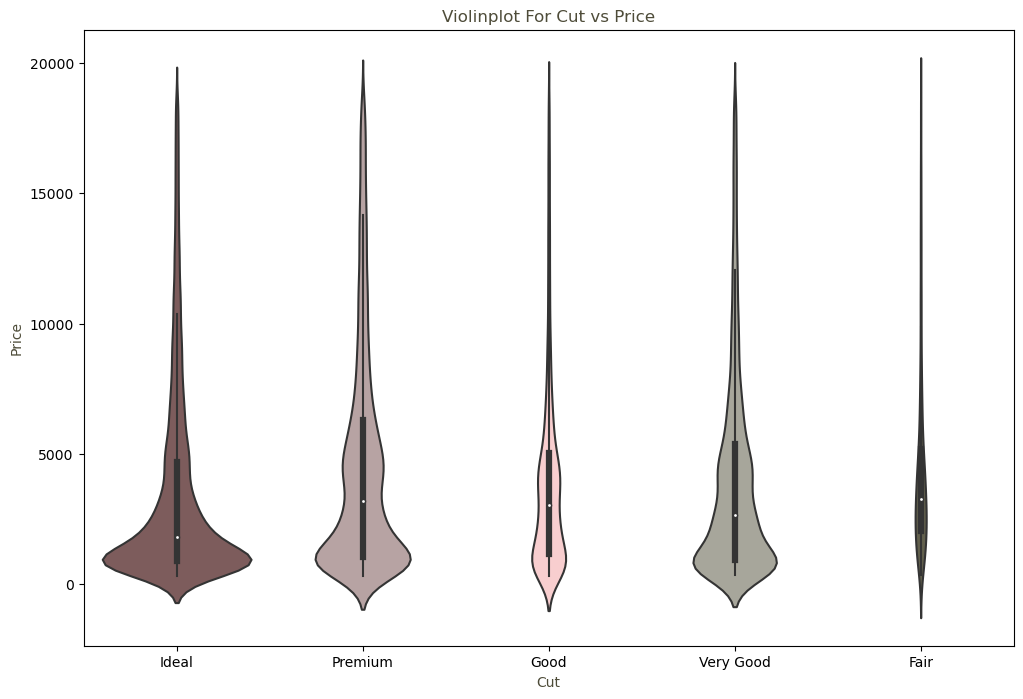

In [20]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=new_data, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

Text(0.5, 0, 'Color')

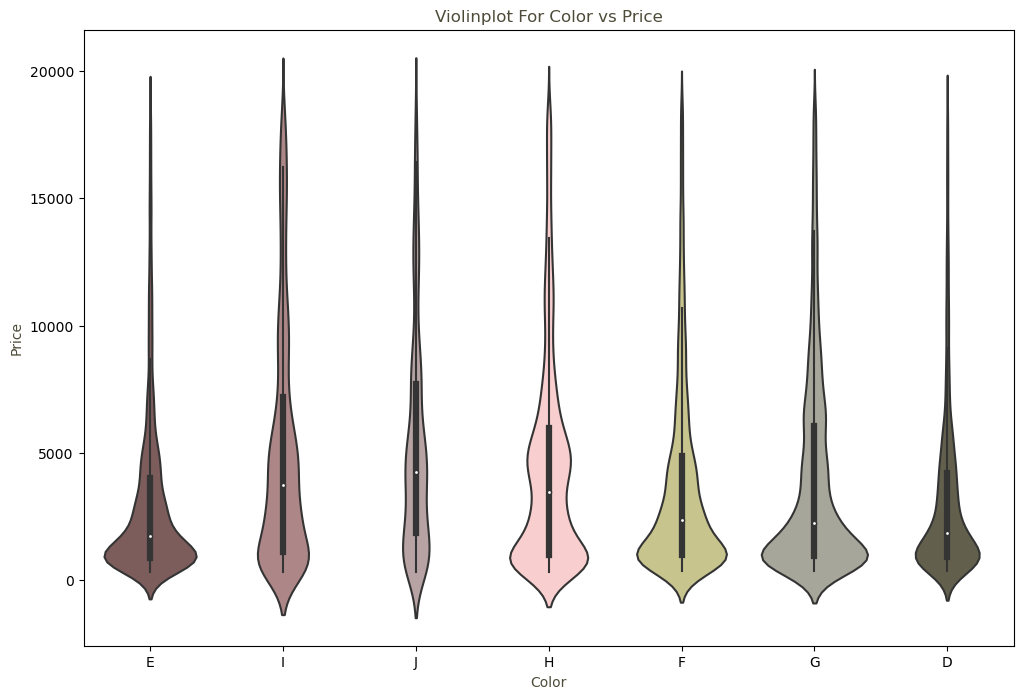

In [21]:
plt.figure(figsize=(12,8))
shade_1 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="color",y="price", data=new_data, palette=shade_1,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Color", color="#4e4c39")

Text(0.5, 0, 'Clarity')

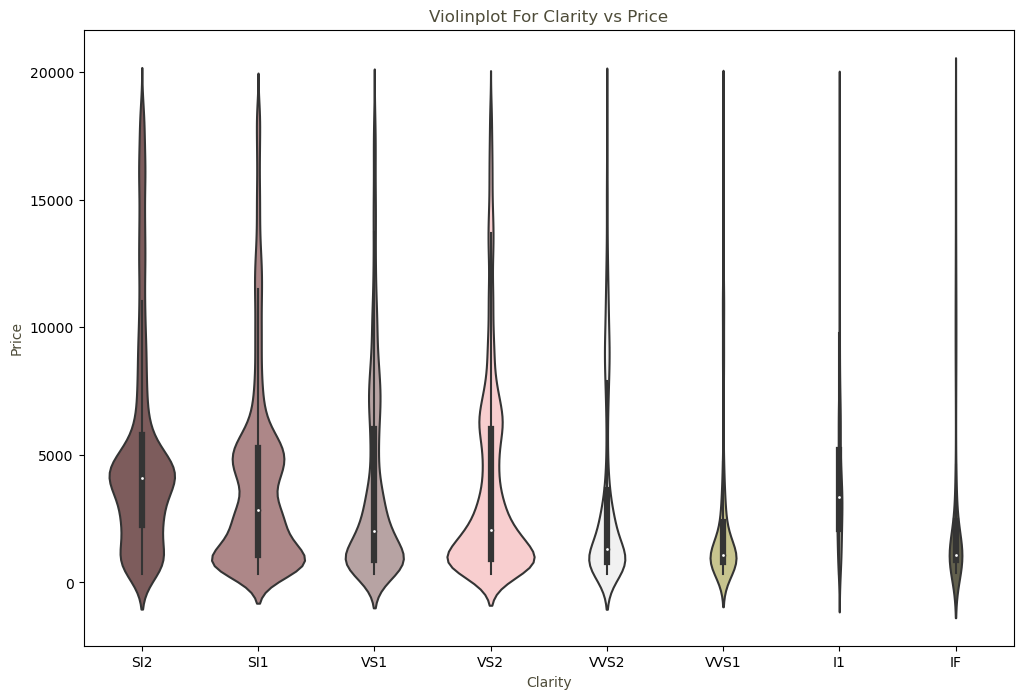

In [22]:
plt.figure(figsize=(12,8))
shade_2 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="clarity",y="price", data=new_data, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Clarity vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

Encodage des étiquettes des données pour se débarrasser du type object.

In [23]:
# creation d'une copie pour conserver les donnees initiales
label_data = new_data.copy()
# encodage 
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [24]:
label_data.describe()

carat           cut         color       clarity         depth  \
count  53907.000000  53907.000000  53907.000000  53907.000000  53907.000000   
mean       0.797628      2.553379      2.594023      3.835569     61.749741   
std        0.473765      1.027442      1.701286      1.724572      1.420119   
min        0.200000      0.000000      0.000000      0.000000     50.800000   
25%        0.400000      2.000000      1.000000      2.000000     61.000000   
50%        0.700000      2.000000      3.000000      4.000000     61.800000   
75%        1.040000      3.000000      4.000000      5.000000     62.500000   
max        5.010000      4.000000      6.000000      7.000000     73.600000   

              table         price             x             y             z  
count  53907.000000  53907.000000  53907.000000  53907.000000  53907.000000  
mean      57.455948   3930.584470      5.731463      5.733292      3.539441  
std        2.226153   3987.202815      1.119384      1.111252      0.691434  
min       43.000000    326.000000      3.730000      3.680000      2.060000  
25%       56.000000    949.000000      4.710000      4.720000      2.910000  
50%       57.000000   2401.000000      5.700000      5.710000      3.530000  
75%       59.000000   5322.000000      6.540000      6.540000      4.040000  
max       79.000000  18823.000000     10.740000     10.540000      6.980000

<Axes: >

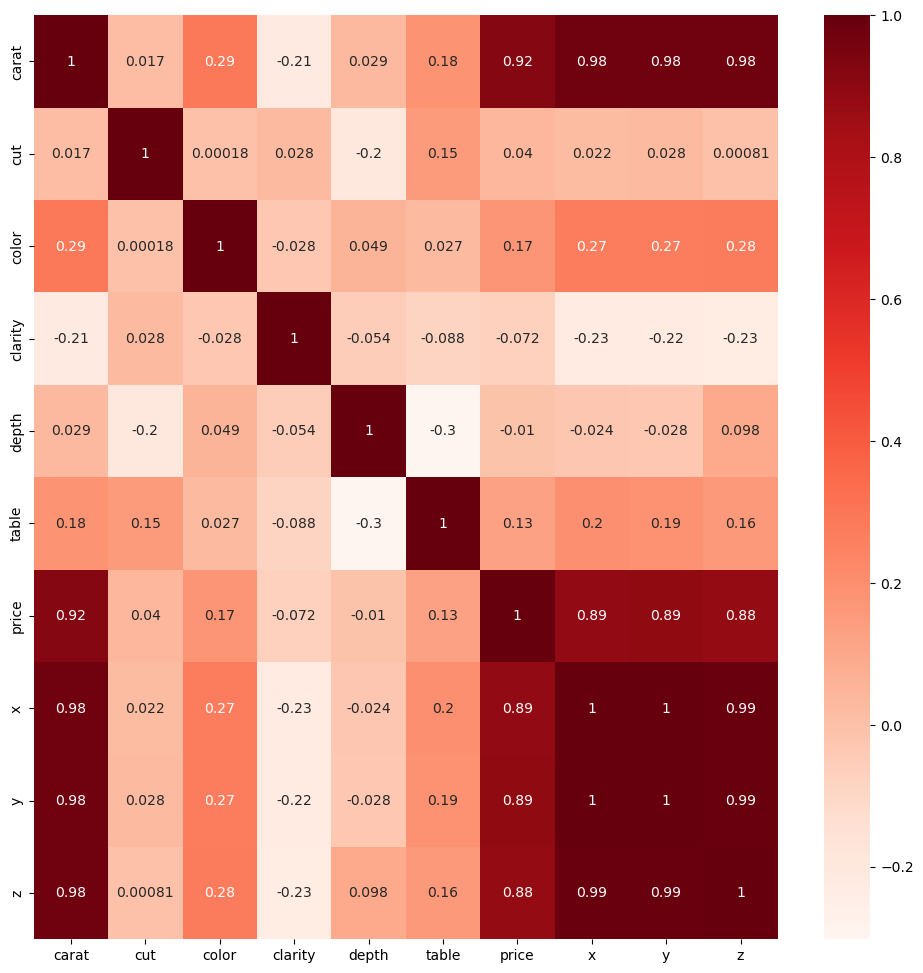

In [25]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap='Reds',annot=True)

"x", "y", "z" et "carat" présentent une forte corrélation avec la colonne cible.
"depth", "cut" et "table" montrent une faible corrélation. Nous pourrions envisager de les supprimer, mais conservons-les pour l'instant. 

# 4. Model Building

In [26]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

## 4.1 Simple models

### 4.1.1 KNeighborsRegressor

#### Model training

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train)) 
print(knn.score(X_test,y_test))

0.9693438564312911
0.9489043801347623


#### Model evaluation

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
y_pred_test_kn =knn.predict(X_test)

In [31]:
print(f'MAE = { mean_absolute_error(y_test, y_pred_test_kn)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_test_kn)}')
print(f'R2 = {r2_score(y_test, y_pred_test_kn)}')

MAE = 480.43987905320176
MSE = 801579.1050910811
R2 = 0.9489043801347623


####  GridSearchcv

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid=[{'n_neighbors':[1,5,7,9,11,13,15]}]
model=knn
grid_search = GridSearchCV(model, param_grid, cv=5,scoring='r2')# score R2 ici#'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Afficher le meilleur score R² obtenu
print(f"Best R² score: {grid_search.best_score_}")

# Afficher les meilleurs hyperparamètres
print(f"Best parameters: {grid_search.best_params_}")

Best R² score: 0.9442476859985094
Best parameters: {'n_neighbors': 7}


### 4.1.2 DecisionTreeRegressor

#### Model training

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
# Créer le modèle d'arbre de décision
model = DecisionTreeRegressor()

# Définir une grille d'hyperparamètres
param_grid = {
    'max_depth': [2, 3, 4, 5]
    #'min_samples_split': [2, 5, 10]
}

# Créer un objet GridSearchCV en utilisant le score R²
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='r2', cv=10) 

# Entraîner le GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher le meilleur score R² obtenu
print(f"Best R² score: {grid_search.best_score_}")

# Afficher les meilleurs hyperparamètres
print(f"Best parameters: {grid_search.best_params_}")

# Le score R² sur les données d'entraînement
best_model = grid_search.best_estimator_
train_score = best_model.score(X_train, y_train)
print(f"Train score (R²): {train_score}")

Best R² score: 0.9261389851981987
Best parameters: {'max_depth': 5}
Train score (R²): 0.9279342244733977


In [36]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
dt.score(X_test,y_test)

0.9283421899002124

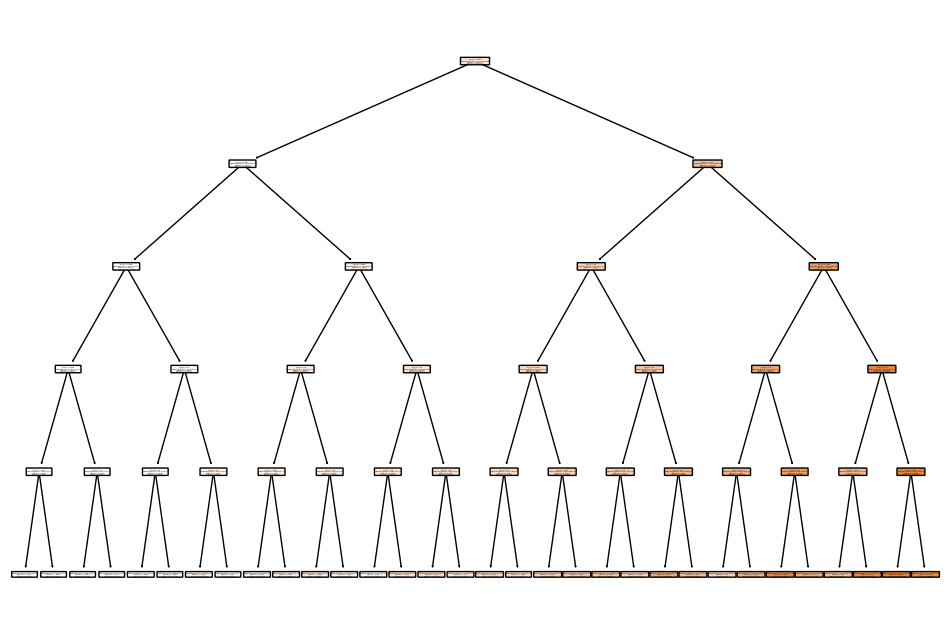

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt,filled= True, rounded=True)
plt.show()

#### Model evaluation

In [38]:
y_pred_test_dt=dt.predict(X_test)

In [39]:
print(f'MAE = { mean_absolute_error(y_test, y_pred_test_dt)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_test_dt)}')
print(f'R2 = {r2_score(y_test, y_pred_test_dt)}')

MAE = 584.2697732058357
MSE = 1124155.1319676342
R2 = 0.9283421899002124


### 4.1.3 Régression linéaire

#### Model training

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
LR=LinearRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train,y_train)) #ensemble training
print(LR.score(X_test,y_test))#ensemle test

0.886288619253774
0.8890105065854335


#### Model evaluation

In [42]:
y_pred_r=LR.predict(X_test)

In [43]:
print(f'MAE = { mean_absolute_error(y_test, y_pred_r)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_r)}')
print(f'R2 = {r2_score(y_test, y_pred_r)}')

MAE = 849.3507396470693
MSE = 1741183.6678057057
R2 = 0.8890105065854335


#### Features important

In [44]:
w0 = LR.intercept_
w_R = LR.coef_

In [45]:
print(f'Intercept = {w0}')
print(f'Coefs = {w_R}')

Intercept = -2231.581399511258
Coefs = [11338.17375565    59.38953661  -265.8970768    283.88004813
   142.50168405   -85.70098975 -1742.18200379  3589.2751824
 -5057.90124059]


In [46]:
feature_names = X_train.columns.to_list()
len(feature_names)

9

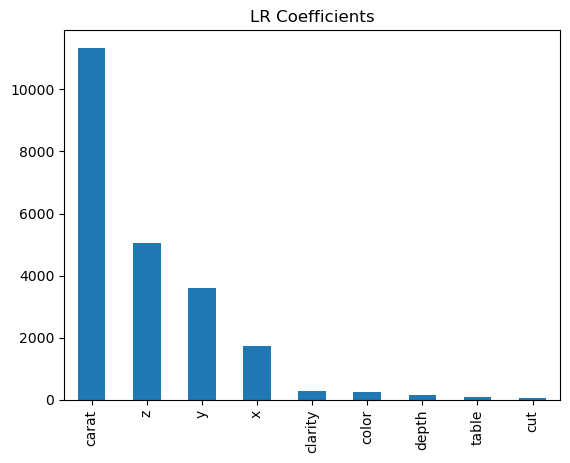

In [47]:
#afficher les variables les plus importantes 
coefR = pd.Series(np.abs(w_R), feature_names ).sort_values(ascending=False)
coefR = coefR.iloc[0:10]
coefR.plot(kind='bar', title='LR Coefficients')
L_R=set(coefR.index)

### 4.1.4 Régularisation

#### 4.1.4.1 Régression Ridge

##### Training

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test) # sur ensemble test
y_ridget = ridge.predict(X_train)

In [50]:
ridge.score(X_test, y_test), ridge.score(X_train, y_train)

(0.889023825502745, 0.8862877706155111)

##### Evaluation

In [51]:
# Calculer les métriques associées
print(f'MAE = {mean_absolute_error(y_test, y_ridge)}')
print(f'MSE = {mean_squared_error(y_test, y_ridge)}')
print(f'R2 = {r2_score(y_test, y_ridge)}')

MAE = 849.5294549948823
MSE = 1740974.7229715397
R2 = 0.889023825502745


##### Features important

In [52]:
w_r = ridge.coef_ #vecteur coefficient (correspondant aux poids)
w_r

array([11318.93032095,    59.59407595,  -265.75933406,   283.95495487,
         134.55515271,   -85.80082435, -1754.76101106,  3525.26493172,
       -4921.09964362])

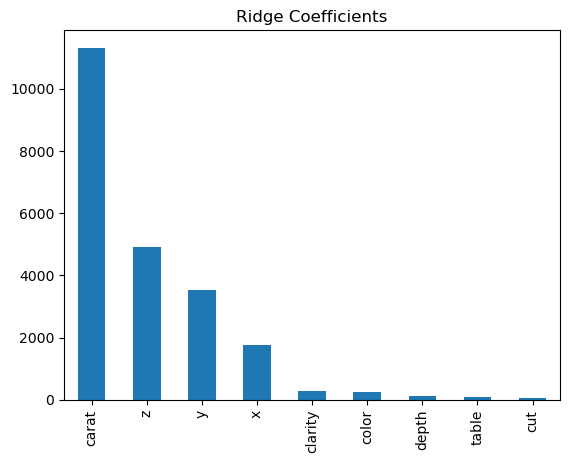

In [53]:
# Représenter les variables par importance
coefr = pd.Series(np.abs(w_r), feature_names ).sort_values(ascending=False)
coefr = coefr.iloc[0:10]
coefr.plot(kind='bar', title='Ridge Coefficients')
L_R=set(coefr.index)

#### 4.1.4.2 Régression Lasso

##### Training

In [54]:
from sklearn.linear_model import Lasso

In [55]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)
y_lassot = lasso.predict(X_train)

C:\Users\Youba\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.612e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(


##### Evaluation

In [56]:
print(f'MAE = {mean_absolute_error(y_test, y_lasso)}')
print(f'MSE = {mean_squared_error(y_test, y_lasso)}')
print(f'R2 = {r2_score(y_test, y_lasso)}')

MAE = 848.0428266232602
MSE = 1740382.30938996
R2 = 0.8890615881377428


##### Features important

In [57]:
w_L = lasso.coef_

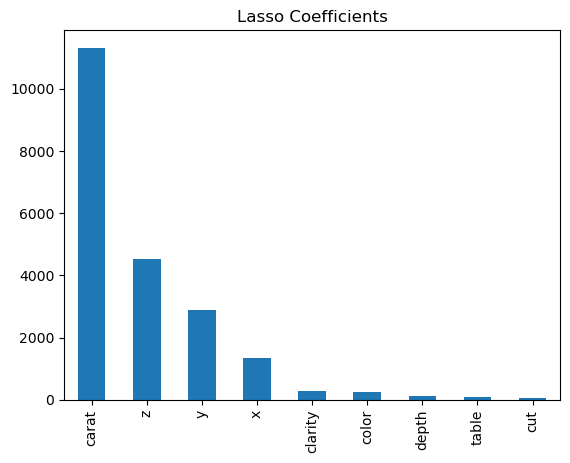

In [58]:
#variable par importance
coefL = pd.Series(np.abs(w_L), feature_names ).sort_values(ascending=False)
coefL = coefL.iloc[0:40]
coefL.plot(kind='bar', title='Lasso Coefficients')
L_R = set(coefL.index)

##### GridSearchCV

In [59]:
param_grid = [
    {'alpha': [0.001,0.1, 1, 10]
     }
]
model = Lasso()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                           scoring='r2')
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_

print(f"Best R² score: {grid_search.best_score_}")

# Afficher les meilleurs hyperparamètres
print(f"Best parameters: {grid_search.best_params_}")

# Si vous voulez obtenir le score R² sur les données d'entraînement
best_model = grid_search.best_estimator_
train_score = best_model.score(X_train, y_train)
print(f"Train score (R²): {train_score}")

C:\Users\Youba\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.901e+10, tolerance: 5.131e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Youba\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.917e+10, tolerance: 5.173e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Youba\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.924e+10, toleranc

Best R² score: 0.8861118170961191
Best parameters: {'alpha': 0.001}
Train score (R²): 0.8862249708375711


C:\Users\Youba\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.666e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(


### 4.1.5 Régression polynomiale

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)

#appliquer une régression linéaire à x_poly et y_train
LR.fit(x_poly, y_train)
print(LR.score(x_poly, y_train))

x_polyt = polynomial_features.fit_transform(X_test)
LR.fit(x_polyt, y_test)
print(LR.score(x_polyt, y_test))
#Evaluer la performance de modèle
y_poly_pred = LR.score(x_poly, y_train)

0.9429646467918134
0.9469394064728328


## 4.2 Ensemble Learning

### 4.2.1 Random Forest

#### Model training

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

#### Model evaluation

In [64]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_rf)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_rf)}')
print(f'R2 = {r2_score(y_test, y_pred_rf)}')

MAE = 270.9638480100135
MSE = 302341.286610898
R2 = 0.9807276470255771


#### Bagging

In [65]:
from sklearn.ensemble import BaggingRegressor

In [66]:
model_Bag=BaggingRegressor(estimator=rf ,n_estimators=5)

In [67]:
### Entrainer le modèle
model_Bag.fit(X_train,y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5)

In [68]:
# Score de bagging
model_Bag.score(X_test,y_test)
model_Bag.score(X_train,y_train)

0.9929306415764949

In [69]:
y_pred_Bag = model_Bag.predict(X_test)

In [70]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_Bag)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_Bag)}')
print(f'R2 = {r2_score(y_test, y_pred_Bag)}')

MAE = 273.21416701399374
MSE = 304685.6072862888
R2 = 0.9805782113462895


### 4.2.2 XGBoost

#### Model training

In [71]:
from xgboost import XGBRegressor

In [72]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : typing.Optional[int]
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth :  typing.Optional[int]
 |  
 |          Maximum tree depth for base learners.
 |  
 |      max_leaves : typing.Optional[int]
 |  
 |          Maximum number of leaves; 0 indicates no limit.
 |  
 |      max_bin : typing.Optional[int]
 |  
 |          If using histogram-based algorithm, maximum number of bins per feature
 |  
 |      grow_policy : typing.O

In [76]:
XGBR = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
XGBR.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [77]:
y_pred_XGBR=XGBR.predict(X_test)

### Model evaluation

In [78]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_XGBR)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_XGBR)}')
print(f'R2 = {r2_score(y_test, y_pred_XGBR)}')

MAE = 363.06465812853503
MSE = 442967.4509825107
R2 = 0.9717636146647013


### 4.2.3 Plusieurs modeles

In [82]:
from sklearn.ensemble import VotingRegressor

In [85]:
MG=VotingRegressor([('DT',dt),('KNN',knn),('LR',LR),('Ridge',ridge),('Lasso',lasso),('RF',rf)])
MG.fit(X_train,y_train)

C:\Users\Youba\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.612e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(


VotingRegressor(estimators=[('DT', DecisionTreeRegressor(max_depth=5)),
                            ('KNN', KNeighborsRegressor(n_neighbors=4)),
                            ('LR', LinearRegression()),
                            ('Ridge', Ridge(alpha=0.5)),
                            ('Lasso', Lasso(alpha=0.01)),
                            ('RF', RandomForestRegressor())])

In [86]:
y_pred_MG = MG.predict(X_test)

In [87]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_MG)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_MG)}')
print(f'R2 = {r2_score(y_test, y_pred_MG)}')

MAE = 540.7609779110285
MSE = 814441.9402990094
R2 = 0.9480844553962067


# 5. Tabulating the results

In [90]:
from tabulate import tabulate

In [95]:
print('comparaison des differents nodeles')
table = [
    ['Model', 'R2_score'],
    ['DT', r2_score(y_test, y_pred_test_dt)],
    ['KNN', r2_score(y_test, y_pred_test_kn)],
    ['LR', r2_score(y_test, y_pred_r)],
    ['Ridge', r2_score(y_test, y_ridge)],
    ['Lasso', r2_score(y_test, y_lasso)],
    ['RF', r2_score(y_test, y_pred_rf)],
    ['Model_Bag', r2_score(y_test, y_pred_Bag)],
    ['XGBoost', r2_score(y_test, y_pred_XGBR)],
    ['MG', r2_score(y_test, y_pred_MG)],
]
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

comparaison des differents nodeles
╒═══════════╤════════════╕
│ Model     │   R2_score │
╞═══════════╪════════════╡
│ DT        │   0.928342 │
├───────────┼────────────┤
│ KNN       │   0.948904 │
├───────────┼────────────┤
│ LR        │   0.889011 │
├───────────┼────────────┤
│ Ridge     │   0.889024 │
├───────────┼────────────┤
│ Lasso     │   0.889062 │
├───────────┼────────────┤
│ RF        │   0.980728 │
├───────────┼────────────┤
│ Model_Bag │   0.980578 │
├───────────┼────────────┤
│ XGBoost   │   0.971764 │
├───────────┼────────────┤
│ MG        │   0.948084 │
╘═══════════╧════════════╛


In [92]:
# Convertir en DataFrame
df = pd.DataFrame(table[1:], columns=table[0])
df['R2_score'] = df['R2_score'].astype(float)  # Convertir en float pour la visualisation

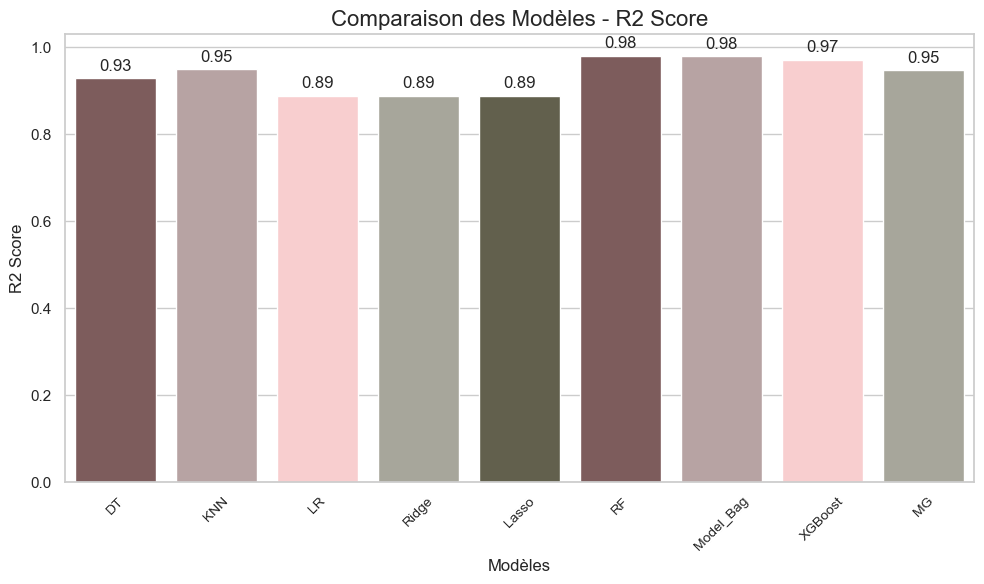

In [111]:
# Configuration de style Seaborn
sns.set(style="whitegrid")

# Graphique à barres
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="R2_score", data=df, palette = shade)

# Personnalisation
ax.set_title("Comparaison des Modèles - R2 Score", fontsize=16)
ax.set_xlabel("Modèles", fontsize=12)
ax.set_ylabel("R2 Score", fontsize=12)
ax.bar_label(ax.containers[0], fmt="%.2f", padding=3)  # Ajouter les scores au-dessus des barres

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Conclusion

Le **RF** et **Model_Bag** sont les plus performants pour la prediction du pris de diamant, les autres modeles ont aussi montres des performances considerables.

In [112]:
### FIN